In [1]:
import pandas as pd


In [2]:
train = pd.read_csv("/content/Train.csv")

In [3]:
train.isnull().sum()

Tweet_ID    0
tweet       0
type        0
dtype: int64

# Analysis of the types

- Taking a look at the different types of tweets

In [4]:
labels = ['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence']

In [6]:
for label in labels:

  print(label, ":" ,train[train['type']==label]['tweet'].values[0])


sexual_violence : Had a dream i got raped last night. By a guy i work with. Actually a guy i smoked with once at my house but he was doing too much tryna be sexual and it wasn’t even like that for me just wanted to smoke.
Physical_violence : My Husband Beats Me Frequently, Wife Tells Court |  
emotional_violence : Is that coked up asshole Steve Corn still working there? He cost you guys your two best original salespeople and insulted me in public high on coke. I sold contracts 4 U guys over the Internet in the late 90's , GA's with Universal &amp; DreamWorks etc. 2 B throw 2 the dogs  
Harmful_Traditional_practice : i was just watching a segment on indias child marriage &amp; i cant help but feel so bad for these little girls getting forced to marry
economic_violence : As a woman that has worked in a much more male-dominated than she, I was thoroughly disgusted by her. Crying and whining because she got fired from an at-will job??? Her whining set women back just as CBF’s lies set us b

In [7]:
train['type'].value_counts()

sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: type, dtype: int64

In [17]:
import nltk
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [18]:
train['text_clean'] = train['tweet'].apply(str).apply(lambda x: text_preprocessing(x))

In [19]:
train['text_len'] = train['text_clean'].astype(str).apply(len)
train['text_word_count'] = train['text_clean'].apply(lambda x: len(str(x).split()))

In [20]:
train

Tweet_ID  ...                                         text_clean
0      ID_0022DWKP  ...  had a dream i got raped last night by a guy i ...
1      ID_00395QYM  ...  he thought the word raped means sex and told m...
2      ID_003EOSSF  ...  she not talking to me i was raped by men moles...
3      ID_004BBHOD  ...  i was sexually abused for years at age to no o...
4      ID_004F7516  ...  chessy prout can do better by telling the trut...
...            ...  ...                                                ...
39645  ID_ZZTLP2L5  ...  entry bf s cousin got drunk on halloween i lik...
39646  ID_ZZXB10M6  ...  so you re telling me emmanuel macron was groom...
39647  ID_ZZY8B7FJ  ...  my wife regularly beats me i get dirty slaps h...
39648  ID_ZZYAFD8L  ...  me hey babe police officer boyfriend is that h...
39649  ID_ZZZ8QEKT  ...  i will take accountability if you think it s o...

[39650 rows x 6 columns]

In [38]:
sexual_violence = train[train['type']=='sexual_violence']
Physical_violence = train[train['type']=='Physical_violence']
emotional_violence = train[train['type']=='emotional_violence']
Harmful_Traditional_practice = train[train['type']=='Harmful_Traditional_practice']
economic_violence = train[train['type']=='economic_violence']

In [34]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [42]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import chart_studio.plotly as py
import plotly.io as pio
pio.renderers.default='notebook'
init_notebook_mode()

trace0 = go.Box(
    y=sexual_violence['text_len'],
    name = 'sexual_violence',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=Physical_violence['text_len'],
    name = 'Physical_violence',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=emotional_violence['text_len'],
    name = 'emotional_violence',
    marker = dict(
        color = 'orange',
    )
)

trace3 = go.Box(
    y=Harmful_Traditional_practice['text_len'],
    name = 'Harmful_Traditional_practice',
    marker = dict(
        color = 'blue',
    )
)

trace4 = go.Box(
    y=economic_violence['text_len'],
    name = 'economic_violence',
    marker = dict(
        color = 'purple',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Length of the text"
)



fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence']

['sexual_violence',
 'Physical_violence',
 'emotional_violence',
 'Harmful_Traditional_practice',
 'economic_violence']

sexual_unigrams = get_top_n_words(sexual_violence['text_clean'],20)
Physical_unigrams = get_top_n_words(Physical_violence['text_clean'],20)
emotional_unigrams = get_top_n_words(emotional_violence['text_clean'],20)
Traditional_unigrams = get_top_n_words(Harmful_Traditional_practice['text_clean'],20)
economic_unigrams = get_top_n_words(economic_violence['text_clean'],20)

In [48]:
sexual_unigrams

[('raped', 33787),
 ('like', 5573),
 ('just', 5167),
 ('said', 5120),
 ('told', 4449),
 ('rape', 4242),
 ('amp', 3933),
 ('man', 3907),
 ('did', 3817),
 ('know', 3527),
 ('got', 3418),
 ('people', 3244),
 ('women', 3160),
 ('say', 2869),
 ('guy', 2616),
 ('girl', 2606),
 ('years', 2589),
 ('tell', 2584),
 ('time', 2542),
 ('dont', 2250)]

In [ ]:

df1 = pd.DataFrame(sexual_unigrams, columns = ['Text' , 'count'])


df2 = pd.DataFrame(Physical_unigrams, columns = ['Text' , 'count'])


df3 = pd.DataFrame(emotional_unigrams, columns = ['Text' , 'count'])


df4 = pd.DataFrame(Traditional_unigrams, columns = ['Text' , 'count'])


df5 = pd.DataFrame(economic_unigrams, columns = ['Text' , 'count'])


plt.show()

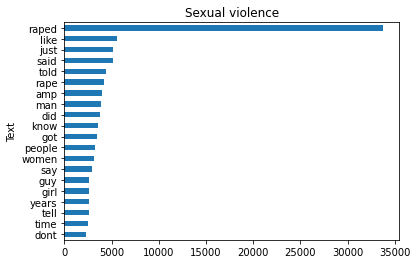

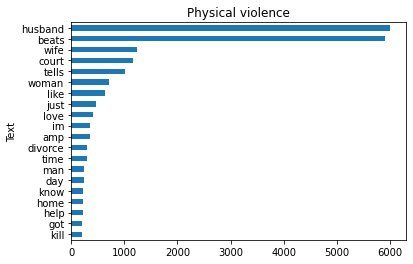

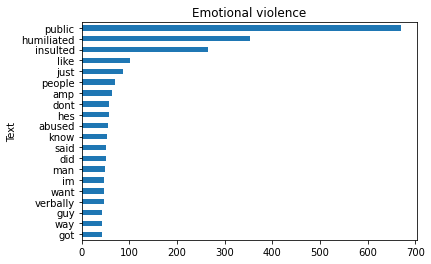

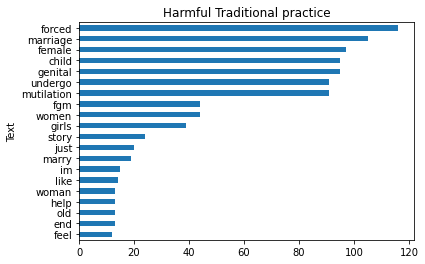

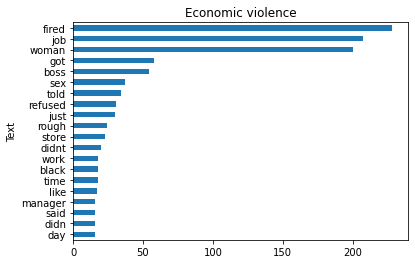

In [137]:
title = ['Sexual violence', 'Physical violence', 'Emotional violence',
       'Harmful Traditional practice', 'Economic violence']
df= [df1, df2, df3, df4, df5]

for i in range(5):
  df[i].groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= title[i])
  plt.savefig("/content/uni_gram_images/"+title[i]+"uni.png")
  plt.show()

In [77]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [78]:


sexual_bigrams = get_top_n_gram(sexual_violence['text_clean'],(2,2),20)
Physical_bigrams = get_top_n_gram(Physical_violence['text_clean'],(2,2),20)
emotional_bigrams = get_top_n_gram(emotional_violence['text_clean'],(2,2),20)
Traditional_bigrams = get_top_n_gram(Harmful_Traditional_practice['text_clean'],(2,2),20)
economic_bigrams = get_top_n_gram(economic_violence['text_clean'],(2,2),20)

#for word, freq in top_bigrams:
    #print(word, freq)
df1_bi = pd.DataFrame(sexual_bigrams, columns = ['Text' , 'count'])
df2_bi = pd.DataFrame(Physical_bigrams, columns = ['Text' , 'count'])
df3_bi = pd.DataFrame(emotional_bigrams, columns = ['Text' , 'count'])
df4_bi = pd.DataFrame(Traditional_bigrams, columns = ['Text' , 'count'])
df5_bi = pd.DataFrame(economic_bigrams, columns = ['Text' , 'count'])

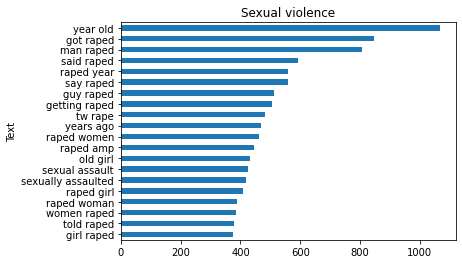

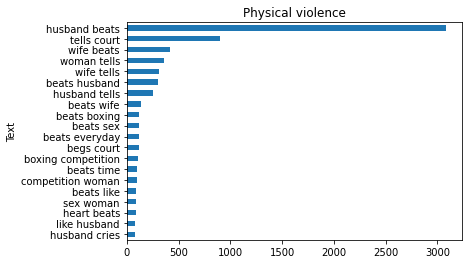

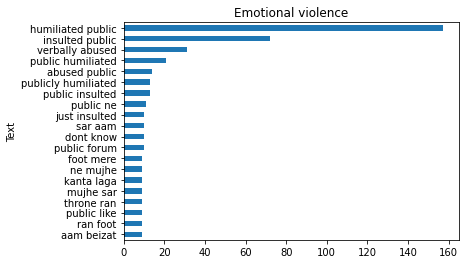

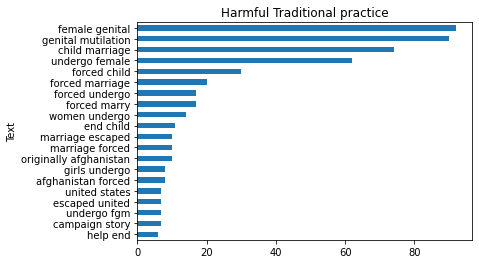

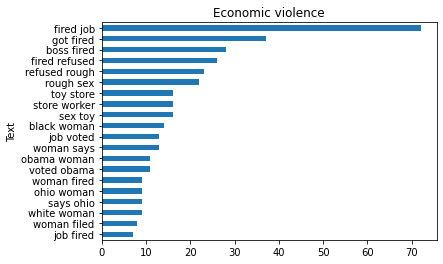

In [135]:
title = ['Sexual violence', 'Physical violence', 'Emotional violence',
       'Harmful Traditional practice', 'Economic violence']

df_2 =[df1_bi, df2_bi, df3_bi, df4_bi, df5_bi]

for i in range(5):
  df_2[i].groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= title[i])
  plt.savefig("/content/bi_gram_images/"+title[i]+"bi.png")
  plt.show()

In [84]:
sexual_trigrams = get_top_n_gram(sexual_violence['text_clean'],(3,3),20)
Physical_trigrams = get_top_n_gram(Physical_violence['text_clean'],(3,3),20)
emotional_trigrams = get_top_n_gram(emotional_violence['text_clean'],(3,3),20)
Traditional_trigrams = get_top_n_gram(Harmful_Traditional_practice['text_clean'],(3,3),20)
economic_trigrams = get_top_n_gram(economic_violence['text_clean'],(3,3),20)

#for word, freq in top_trigrams:
    #print(word, freq)
df1_tri = pd.DataFrame(sexual_trigrams, columns = ['Text' , 'count'])
df2_tri = pd.DataFrame(Physical_trigrams, columns = ['Text' , 'count'])
df3_tri = pd.DataFrame(emotional_trigrams, columns = ['Text' , 'count'])
df4_tri = pd.DataFrame(Traditional_trigrams, columns = ['Text' , 'count'])
df5_tri = pd.DataFrame(economic_trigrams, columns = ['Text' , 'count'])

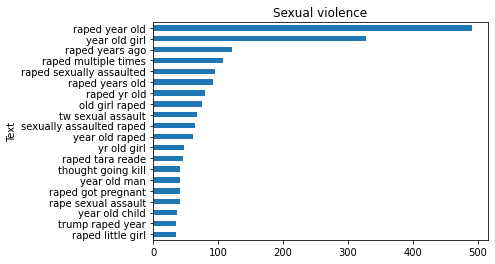

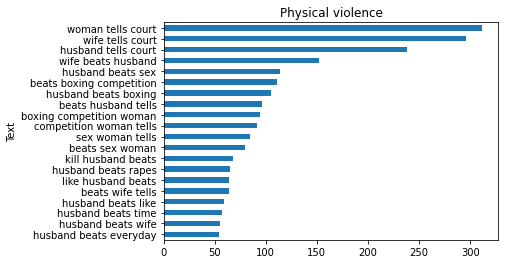

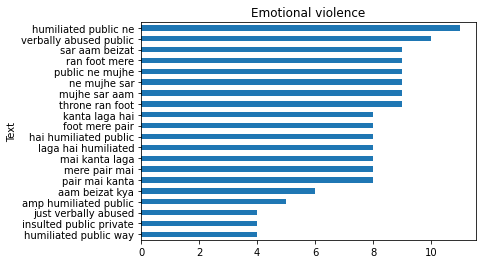

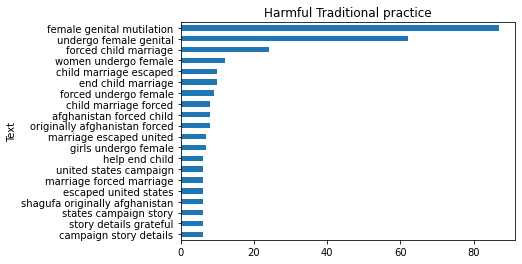

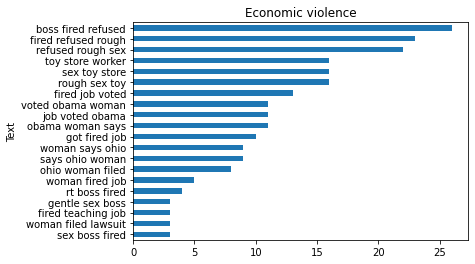

In [134]:

title = ['Sexual violence', 'Physical violence', 'Emotional violence',
       'Harmful Traditional practice', 'Economic violence']
df_3 = [df1_tri, df2_tri, df3_tri, df4_tri, df5_tri]


for i in range(5):
    
  df_3[i].groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= title[i])
    
    # plt.savefig("/content/trigram.png", format="png")
  
  plt.savefig("/content/tri_gram_images/"+title[i]+"tri.png")
  plt.show()
  

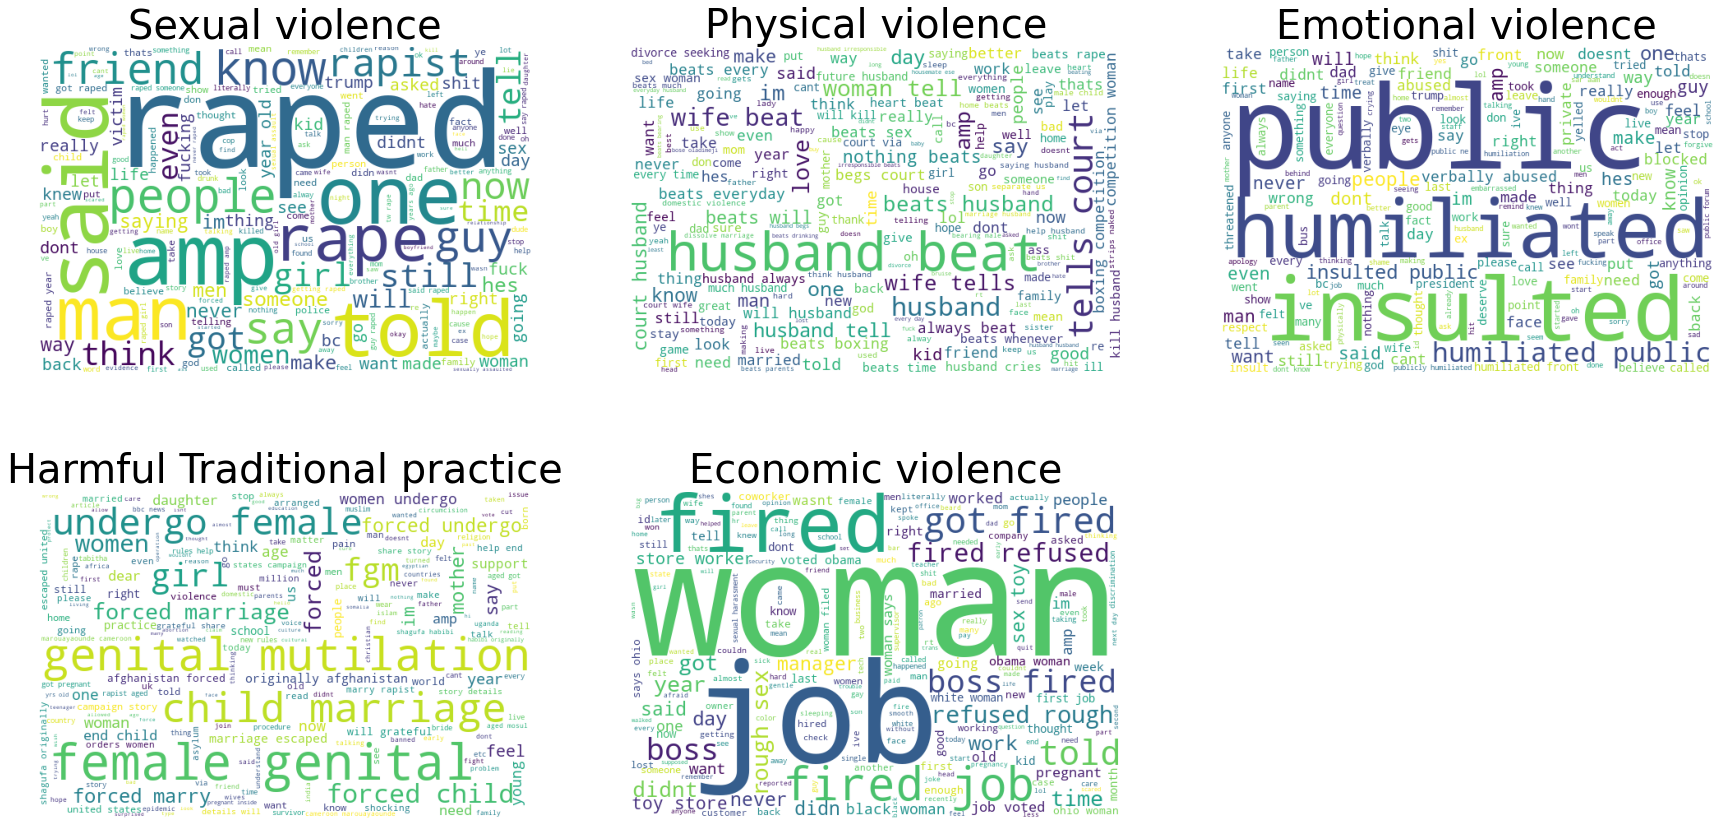

In [101]:
from wordcloud import WordCloud
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2, 3, figsize=[30, 15], squeeze=False)

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(sexual_violence.text_clean))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Sexual violence',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Physical_violence.text_clean))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Physical violence',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emotional_violence.text_clean))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Emotional violence',fontsize=40);

wordcloud4 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Harmful_Traditional_practice.text_clean))
ax4.imshow(wordcloud4)
ax4.axis('off')
ax4.set_title('Harmful Traditional practice',fontsize=40);


wordcloud5 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(economic_violence.text_clean))
ax5.imshow(wordcloud5)
ax5.axis('off')
ax5.set_title('Economic violence',fontsize=40);

ax6.remove()
plt.savefig("/content/word_cloud.png", format="png")

In [141]:
!zip -r /content/unigram.zip /content/uni_gram_images

  adding: content/uni_gram_images/ (stored 0%)
  adding: content/uni_gram_images/Economic violenceuni.png (deflated 12%)
  adding: content/uni_gram_images/Emotional violenceuni.png (deflated 12%)
  adding: content/uni_gram_images/Sexual violenceuni.png (deflated 11%)
  adding: content/uni_gram_images/Physical violenceuni.png (deflated 12%)
  adding: content/uni_gram_images/Harmful Traditional practiceuni.png (deflated 11%)
